In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# EDA

In [2]:
df = pd.read_csv('canada_rent.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25771 entries, 0 to 25770
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rentfaster_id      25771 non-null  int64  
 1   city               25771 non-null  object 
 2   province           25771 non-null  object 
 3   address            25646 non-null  object 
 4   latitude           25771 non-null  float64
 5   longitude          25771 non-null  float64
 6   lease_term         25725 non-null  object 
 7   type               25771 non-null  object 
 8   price              25771 non-null  float64
 9   beds               25639 non-null  object 
 10  baths              25637 non-null  object 
 11  sq_feet            21659 non-null  object 
 12  link               25771 non-null  object 
 13  furnishing         25771 non-null  object 
 14  availability_date  25759 non-null  object 
 15  smoking            23069 non-null  object 
 16  cats               255

In [4]:
df.head()

,rentfaster_id,city,province,address,latitude,longitude,lease_term,type,price,beds,baths,sq_feet,link,furnishing,availability_date,smoking,cats,dogs
0,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2495.0,2 Beds,2.5,1403,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...,Unfurnished,Immediate,Non-Smoking,True,True
1,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2695.0,3 Beds,2.5,1496,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...,Unfurnished,Immediate,Non-Smoking,True,True
2,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2295.0,2 Beds,2.5,1180,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...,Unfurnished,Immediate,Non-Smoking,True,True
3,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2095.0,2 Beds,2.5,1403,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...,Unfurnished,November 18,Non-Smoking,True,True
4,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2495.0,2 Beds,2.5,1403,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...,Unfurnished,Immediate,Non-Smoking,True,True


In [5]:
df.describe()

,rentfaster_id,latitude,longitude,price
count,25771.000000,25771.000000,25771.000000,25771.000000
mean,471913.795274,48.903370,-100.332196,2151.624142
std,120330.335865,3.603257,17.917001,972.820941
min,820.000000,40.741802,-128.661880,0.000000
25%,415749.000000,45.418785,-114.074660,1600.000000
50%,522379.000000,50.913739,-113.513905,2045.000000
75%,563397.500000,51.093585,-79.401311,2550.000000
max,572635.000000,62.459246,-52.695472,29990.000000


In [6]:
df.isnull().sum()

rentfaster_id           0
city                    0
province                0
address               125
latitude                0
longitude               0
lease_term             46
type                    0
price                   0
beds                  132
baths                 134
sq_feet              4112
link                    0
furnishing              0
availability_date      12
smoking              2702
cats                  173
dogs                  173
dtype: int64

In [7]:
# Create a copy of original dataframe
df2 = df.copy()

#Drop all duplicated rows
df2.drop_duplicates(inplace =True)

#Lets drop columns which don't seem useful for our model
df2.drop(['rentfaster_id','address','link','longitude','latitude','province'],axis=1,inplace= True)

#Notice we drop many columns related to location, since it may be redundant to keep all of these in our model.
#Keeping the city column should be enough, not too specific but not too broad either

In [8]:
#Lets inspect the remaining columns 
df2['availability_date'].nunique()

132

In [9]:
df2['availability_date'].value_counts()

availability_date
Immediate       11599
July 01          2577
August 01        1216
No Vacancy        527
September 01      431
                ...  
September 04        1
September 29        1
November 24         1
May 08              1
October 05          1
Name: count, Length: 132, dtype: int64

In [10]:
# With lots of random available dates and many that have 1 or very few data points, 
# it can cause a high dimensional data problem (Curse of Dimensionality)
# Lets group them by whether they are at the beginning or end of the month.

#Function to extract month from each value in column
def extract_date(val):
    #Ignore null values
    if pd.isna(val):
        return val
    parts = val.split()     
    #Check each part if it contains digits, if no digits leave value as is
    for part in parts:    
        if part.isdigit():
            #Determine if its early/late during the month
            if int(part) <= 15:                 
                return 'early ' + parts[0]      
            else:                              
                return 'late ' + parts[0]      
    return val

# Apply the function to the 'date' column
df2['availability_date'] = df2['availability_date'].apply(extract_date)

In [11]:
df2['availability_date'].value_counts()

availability_date
Immediate                11599
early July                3286
early August              1483
early September            542
No Vacancy                 527
late June                  390
early June                 268
late July                  239
Call for Availability      205
Negotiable                 129
early November              87
early December              82
late August                 72
early October               53
late September              30
early January               15
early May                   10
late October                 5
late November                4
late May                     4
late December                2
early March                  2
late January                 1
late March                   1
late February                1
Name: count, dtype: int64

In [12]:
#Manage to reduce catergories of available_date from 132 to 25
df2['availability_date'].nunique()

25

In [13]:
#Repeat for city
df2['city'].value_counts().sort_values()

city
Pelham          1
De Winton       1
Sundre          1
Banff           1
Westerose       1
             ... 
Ottawa       1084
Montréal     1516
Toronto      2395
Edmonton     2570
Calgary      4721
Name: count, Length: 269, dtype: int64

In [14]:
#Find all citys with 10 or less data points
city = df2['city'].value_counts()
city_less_than_10 = city[city<=10]
#Replace those cities as 'other'
df2['city'] =df2['city'].apply(lambda x: 'other' if x in city_less_than_10 else x)
#Manage to reduce catergories of city from 269 to 103
df2['city'].nunique()

103

In [15]:
df2[['cats','dogs']].value_counts()

cats   dogs 
True   True     11915
False  False     5697
True   False      940
False  True       392
Name: count, dtype: int64

In [16]:
df3 = df2.copy()

In [17]:
# Assuming Nan means no beds/baths i.e(none beds and none)
df3['beds'] = df3['beds'].fillna('none Beds')
df3['baths'] = df3['baths'].fillna('none')

# Using the mode of each feature to replace the missing values
df3['lease_term'] = df3['lease_term'].fillna(df3['lease_term'].mode()[0])
df3['smoking'] = df3['smoking'].fillna(df3['smoking'].mode()[0])

# Assuming Nan means no vacancy
df3['availability_date'] = df3['availability_date'].fillna('No Vacancy')

# Seeing a majority of listings allow both cats and dogs
# let the missing values == True
df3['cats'] = df3['cats'].fillna(True)
df3['dogs'] = df3['dogs'].fillna(True)
df3['cats'] = df3['cats'].map({True:1,False:0})
df3['dogs'] = df3['dogs'].map({True:1,False:0})

In [18]:
#Exploring sq_feet column
df3['sq_feet'].value_counts()

sq_feet
0            523
900          255
1000         251
600          246
700          240
            ... 
1973           1
~1800 sft      1
1827           1
2357           1
334            1
Name: count, Length: 1896, dtype: int64

In [19]:
#Lets deal with the values containing letters and symbols.

import re
#Create a function to find and extract numbers within a string
def extract_number(s):
    if pd.isna(s):
        return s
    match = re.search(r'\d+', s)
    return match.group() if match else s
#Apply the function to sq_feet column
df3['sq_feet'] = df3['sq_feet'].apply(extract_number)


In [20]:
#Convert sq_feet column to numeric
df3['sq_feet'] = pd.to_numeric(df3['sq_feet'], errors='coerce')

#Drop all Nan values for sq_feet 
df3.dropna(subset=['sq_feet'],inplace=True)

In [21]:
df3 = df3[df3['price'] != 0]

In [22]:
#Explore baths
df3['baths'].unique()

array(['2.5', '1', '2', '1.5', '3.5', '4', '3', '5', 'none', '4.5', '7.5',
       '5.5', '6', '6.5', '0', '7'], dtype=object)

In [23]:
#Lets assume none means 0 baths
df3['baths'] = df3['baths'].replace('none','0')
#Convert baths column to numeric
df3['baths'] = pd.to_numeric(df3['baths'])

In [24]:
# Check for any nulls left
df3.isna().sum()

city                 0
lease_term           0
type                 0
price                0
beds                 0
baths                0
sq_feet              0
furnishing           0
availability_date    0
smoking              0
cats                 0
dogs                 0
dtype: int64

<Axes: >

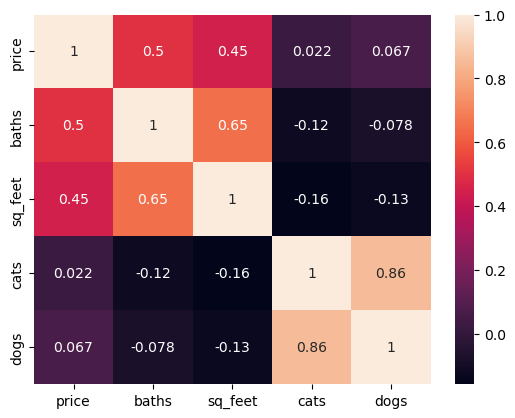

In [25]:
#Observe correlations using heatmaps
sns.heatmap(df3.corr(numeric_only=True),annot=True)

<Axes: xlabel='sq_feet', ylabel='baths'>

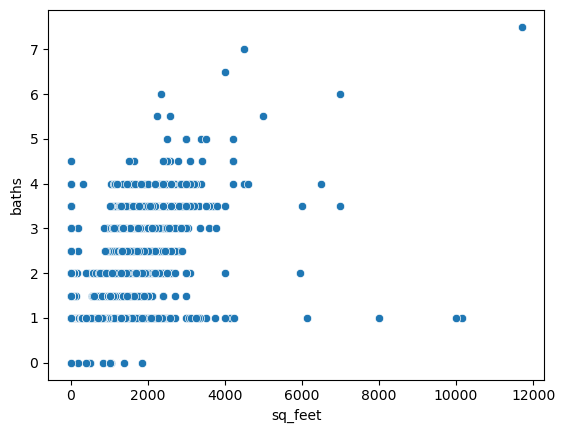

In [26]:
#Explore relationship between sq_feet and baths (highest correlation)
sns.scatterplot(df3,x='sq_feet',y='baths')

In [27]:
# Lets observe those strange points past 9000 sq_feet
df3[df3['sq_feet']>9000]

,city,lease_term,type,price,beds,baths,sq_feet,furnishing,availability_date,smoking,cats,dogs
2291,Calgary,Negotiable,House,26500.0,8 Beds,7.5,11700.0,Unfurnished,Immediate,Non-Smoking,1,1
24077,Montréal,Long Term,Office Space,15.0,Studio,1.0,10154.0,Unfurnished,Immediate,Non-Smoking,1,1
24876,Quebec City,Long Term,Apartment,22.0,Studio,1.0,10000.0,Unfurnished,Immediate,Non-Smoking,0,0


The office space and the apartment has 10000+ square feet for around 20$!? When can I move in!
We definitely need to clean these from our data.

<Axes: xlabel='sq_feet', ylabel='price'>

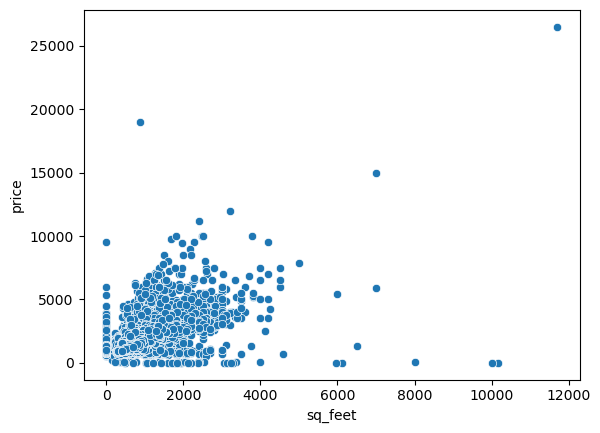

In [28]:
# Relationship between sq_feet and price
sns.scatterplot(df3,x='sq_feet',y='price')

In [29]:
#There's a lot of points hovering around $0 
#Check values under 200$
df3[df3['price']<=200]

,city,lease_term,type,price,beds,baths,sq_feet,furnishing,availability_date,smoking,cats,dogs
1924,Calgary,Negotiable,Parking Spot,120.0,2 Beds,1.0,680.0,Negotiable,Immediate,Non-Smoking,1,1
6190,Edmonton,Long Term,House,1.0,6 Beds,2.5,1600.0,Unfurnished,Immediate,Non-Smoking,1,1
10031,Calgary,Negotiable,Office Space,1.0,none Beds,0.0,1026.0,Unfurnished,Immediate,Non-Smoking,1,1
23040,Laval,Long Term,Apartment,35.0,Studio,1.0,3360.0,Unfurnished,Immediate,Non-Smoking,0,0
23041,Laval,Long Term,Apartment,40.0,Studio,1.0,1375.0,Unfurnished,Immediate,Non-Smoking,0,0
23042,Laval,Long Term,Apartment,40.0,Studio,1.0,1845.0,Unfurnished,Immediate,Non-Smoking,0,0
23043,Laval,Long Term,Apartment,40.0,Studio,1.0,2550.0,Unfurnished,Immediate,Non-Smoking,0,0
23044,Laval,Long Term,Apartment,22.0,Studio,1.0,3300.0,Unfurnished,Immediate,Non-Smoking,0,0
23045,Laval,Long Term,Apartment,35.0,Studio,1.0,2415.0,Unfurnished,Immediate,Non-Smoking,0,0
23046,Laval,Long Term,Apartment,35.0,Studio,1.0,2395.0,Unfurnished,Immediate,Non-Smoking,0,0


In [30]:
# For now, we can drop all these rows for appartment/office space since the pricing doesn't make any sense for 2024
# The parking spot we'll need to further inspect
df4 = df3.copy()
# Drop all rows under $100
df4 = df4[df4['price']>100]

In [31]:
#Lets explore parking spaces
df4[df4['type'] == 'Parking Spot']

,city,lease_term,type,price,beds,baths,sq_feet,furnishing,availability_date,smoking,cats,dogs
958,Calgary,Negotiable,Parking Spot,1990.0,1 Bed,1.0,550.0,Furnished,Immediate,Non-Smoking,1,1
1924,Calgary,Negotiable,Parking Spot,120.0,2 Beds,1.0,680.0,Negotiable,Immediate,Non-Smoking,1,1


The first row is furnished... so we can assume they labeled the type wrong.
The second row could be a parking spot for rent based on its price... but then again it says 2 Beds 1 Bath.

In [32]:
#Drop 1924, change 958
df4.loc[958,'type'] = df4['type'].mode()[0]   #change to mode of rental types
df4 = df4.drop([1924])

In [33]:
df4['type'].unique()

array(['Townhouse', 'Apartment', 'Main Floor', 'Basement', 'House',
       'Duplex', 'Room For Rent', 'Condo Unit', 'Loft', 'Acreage',
       'Vacation Home', 'Office Space', 'Mobile'], dtype=object)

In [34]:
# Sort values by highest price and lowest sq_feet
df4.sort_values(by=['price','sq_feet'], ascending=[False,True])

,city,lease_term,type,price,beds,baths,sq_feet,furnishing,availability_date,smoking,cats,dogs
2291,Calgary,Negotiable,House,26500.0,8 Beds,7.5,11700.0,Unfurnished,Immediate,Non-Smoking,1,1
15179,Winnipeg,Long Term,Apartment,18955.0,2 Beds,2.0,885.0,Unfurnished,early November,Non-Smoking,1,1
2460,Calgary,12 months,House,14995.0,3 Beds,3.5,7000.0,Unfurnished,Immediate,Non-Smoking,0,0
1328,Calgary,Negotiable,House,12000.0,4 Beds,3.5,3200.0,Furnished,Immediate,Non-Smoking,0,1
223,Calgary,Long Term,Apartment,11200.0,2 Beds,2.0,2416.0,Furnished,Immediate,Non-Smoking,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9073,other,Long Term,Apartment,575.0,1 Bed,1.0,0.0,Unfurnished,Immediate,Non-Smoking,1,1
7102,Edmonton,Long Term,House,550.0,7 Beds,2.0,2600.0,Negotiable,Immediate,Non-Smoking,0,0
24136,Montréal,Long Term,Office Space,500.0,Studio,1.0,191.0,Unfurnished,Immediate,Non-Smoking,1,1
6541,Edmonton,Long Term,Room For Rent,500.0,6 Beds,3.0,2550.0,Unfurnished,Immediate,Non-Smoking,0,1


In [35]:
#Drop the outlier
df4 = df4.drop([15179])

In [36]:
#Explore rental properties with low sq_feet
df4[df4['sq_feet'] <= 200].sort_values(by='sq_feet',ascending=False)

,city,lease_term,type,price,beds,baths,sq_feet,furnishing,availability_date,smoking,cats,dogs
7392,Edmonton,Long Term,Room For Rent,625.0,1 Bed,0.0,200.0,Furnished,early July,Non-Smoking,0,0
6584,Edmonton,Long Term,Apartment,719.0,Studio,1.0,200.0,Unfurnished,Immediate,Non-Smoking,1,1
7104,Edmonton,Negotiable,Room For Rent,700.0,2 Beds,2.5,200.0,Furnished,Immediate,Negotiable,0,0
12844,Calgary,Short Term,Room For Rent,700.0,1 Bed,1.0,200.0,Unfurnished,early July,Non-Smoking,0,0
24136,Montréal,Long Term,Office Space,500.0,Studio,1.0,191.0,Unfurnished,Immediate,Non-Smoking,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8414,Medicine Hat,Long Term,Apartment,1410.0,2 Beds,1.0,0.0,Unfurnished,Immediate,Non-Smoking,1,1
8410,Medicine Hat,Long Term,Apartment,1295.0,1 Bed,1.0,0.0,Unfurnished,Immediate,Non-Smoking,1,1
8403,Medicine Hat,Long Term,Apartment,1240.0,2 Beds,1.0,0.0,Unfurnished,Immediate,Non-Smoking,1,1
8400,Medicine Hat,Long Term,Apartment,1440.0,2 Beds,1.0,0.0,Unfurnished,Immediate,Non-Smoking,1,1


According to International Residential Building code, anything below 70sq_ft is not considered for a room.

In [37]:
#Drop all rows below 70 sq feet
df4 = df4[df4['sq_feet'] >= 70]

Notice the rows with type 'Room for rent' that have more then 1 bedroom, which is contradicting.
Let's change it to 1 bedroom.


In [38]:
df4.loc[df4['type'] == 'Room For Rent', 'beds'] = '1 Bed'

# Regression Models

##### Transforming Categorical Data

In [39]:
#,columns=['city','lease_term','type','beds','furnishing','availability_date','smoking']

In [40]:
# dummies = pd.get_dummies(df4,dtype=float)
# dummies

# new_column_names = [col.split('_')[-1] for col in dummies.columns]
# dummies.columns = new_column_names
# df_transformed = dummies

In [41]:
#Get a list of all object type columns
s = (df4.dtypes == 'object')
cols = list(s[s].index)

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown = 'ignore', sparse_output = False).set_output(transform= 'pandas')

#Transform categorical columns and putting them into a dataframe
data_cols = pd.DataFrame(ohe.fit_transform(df4[cols]))

# Combine dataframes
df_transformed = pd.concat([df4,data_cols], axis = 1).drop(columns = cols)
df_transformed

,price,baths,sq_feet,cats,dogs,city_Abbotsford,city_Airdrie,city_Ajax,city_Aurora,city_Barrie,...,availability_date_late June,availability_date_late March,availability_date_late May,availability_date_late November,availability_date_late October,availability_date_late September,smoking_Negotiable,smoking_Non-Smoking,smoking_Smoke Free Building,smoking_Smoking Allowed
0,2495.0,2.5,1403.0,1,1,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2695.0,2.5,1496.0,1,1,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2295.0,2.5,1180.0,1,1,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2095.0,2.5,1403.0,1,1,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6,2495.0,2.5,1351.0,1,1,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25766,920.0,1.0,400.0,1,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25767,1450.0,1.0,810.0,1,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25768,1125.0,1.0,520.0,1,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25769,920.0,1.0,400.0,1,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [42]:
#First lets seperate independent features X from target variable y
X = df_transformed.drop('price',axis = 1)
y = df_transformed['price']

In [43]:
# Train/Test/Split 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)

## Linear Model

In [44]:
#Scale Data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [45]:
from sklearn.linear_model import LinearRegression
#Create instance
lr_model = LinearRegression()

lr_model.fit(X_scaled_train, y_train)

LinearRegression()

In [46]:
y_pred = lr_model.predict(X_scaled_test)

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

#Obtain Metrics
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,y_pred)

print('MAE:', MAE, 
      '\nMSE:', MSE,
      '\nRMSE:', RMSE,
      '\nR2 Score:',R2)

MAE: 306.7810308705799 
MSE: 207465.3470277022 
RMSE: 455.4836407904264 
R2 Score: 0.7114864173914957


## LassoCV Model

In [47]:
from sklearn.linear_model import LassoCV

# Create instance of model
lassocv_model = LassoCV(eps=0.01,n_alphas=200,cv=10)

# Fit the model on scaled_X_train
lassocv_model.fit(X_scaled_train, y_train)

LassoCV(cv=10, eps=0.01, n_alphas=200)

In [48]:
y_pred = lassocv_model.predict(X_scaled_test)

# Obtain metrics

MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,y_pred)

print('MAE:', MAE, 
      '\nMSE:', MSE,
      '\nRMSE:', RMSE,
      '\nR2 Score:',R2)

MAE: 296.40475230558644 
MSE: 201448.575535317 
RMSE: 448.8302301932402 
R2 Score: 0.7198536957050783


## RidgeCV model

In [49]:
from sklearn.linear_model import RidgeCV

# Create instance of model
ridgecv_model = RidgeCV((0.1, 1.0, 10.0), scoring='neg_mean_absolute_error')

# Fit the model on scaled_X_train
ridgecv_model.fit(X_scaled_train, y_train)

RidgeCV(scoring='neg_mean_absolute_error')

In [50]:
y_pred = ridgecv_model.predict(X_scaled_test)

# Obtain metrics

MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,y_pred)

print('MAE:', MAE, 
      '\nMSE:', MSE,
      '\nRMSE:', RMSE,
      '\nR2 Score:',R2)

MAE: 296.1323417660381 
MSE: 200380.23306348515 
RMSE: 447.6385071276656 
R2 Score: 0.7213393959360661


## Put the model to the Test

Out of the 3 models, we're going to use the RidgeCV model to predict rental prices.  

Link to the rental property the model will predict: https://www.rentfaster.ca/qc/montreal/rentals/apartment/1-bedroom/pet-friendly/422120

In [51]:
new_input={
    'city' : 'Montréal',
    'lease_term':'Long Term',
    'type' :'Apartment',
    'beds' :'3 Beds',
    'baths' : 1,
    'sq_feet' :1043,
    'furnishing': 'Unfurnished',
    'availability_date': 'Immediate',
    'smoking': 'Non-Smoking',
    'cats': 1,
    'dogs': 1
}

In [52]:
# Convert the new input to a DataFrame
new_input_df = pd.DataFrame([new_input])

# Transform categorical data using pandas
categorical_columns = ['city', 'lease_term', 'type', 'beds', 'furnishing', 'availability_date', 'smoking']
new_input_dummy = pd.get_dummies(new_input_df, columns=categorical_columns,dtype=float)


In [60]:
new_input_dummy

,baths,sq_feet,cats,dogs,city_Abbotsford,city_Airdrie,city_Ajax,city_Aurora,city_Barrie,city_Beaumont,...,availability_date_late June,availability_date_late March,availability_date_late May,availability_date_late November,availability_date_late October,availability_date_late September,smoking_Negotiable,smoking_Non-Smoking,smoking_Smoke Free Building,smoking_Smoking Allowed
0,1,1043,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1.0,0,0


In [55]:
# Add missing columns to the new input
for col in df_transformed.columns:
    if col not in new_input_dummy.columns:
        new_input_dummy[col] = 0

In [56]:
# Correct the order of columns
new_input_dummy = new_input_dummy[df_transformed.columns]

In [57]:
# Remove dependent variable
new_input_dummy.drop('price',axis=1, inplace=True)

In [58]:
#Scale input
X_new_scaled = scaler.transform(new_input_dummy)

In [59]:
#Predict!
prediction= ridgecv_model.predict(X_new_scaled)
prediction[0]

2689.8637708396154

Not bad given the true price was $2540